In [1]:
import os
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from torchsummary import summary
import torch.utils.data as utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
from torch.utils.data import Dataset

In [2]:
df = pd.read_csv('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/ADNI/Utils/csf_adni.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,RID,PTID,VISCODE,COLPROT,EXAMDATE,DX_bl,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl,SUBJ
0,0,1,3,011_S_0003,bl,ADNI1,2005-09-12,AD,81.3,Male,741.5,239.7,22.83,0.0,S9128
1,1,5,4,022_S_0004,bl,ADNI1,2005-11-08,LMCI,67.5,Male,1501.0,153.1,13.29,0.0,S9233
2,2,10,5,011_S_0005,bl,ADNI1,2005-09-07,CN,73.7,Male,547.3,337.0,33.43,0.0,S9137
3,3,22,10,011_S_0010,bl,ADNI1,2005-11-10,AD,73.9,Female,357.4,329.9,31.26,0.0,S8800
4,4,26,14,022_S_0014,bl,ADNI1,2005-11-04,CN,78.5,Female,1582.0,203.6,16.68,0.0,S9271


In [4]:
interpolator = sitk.sitkLinear
default_value = 0
print('*Translation Transform*')
transform = sitk.TranslationTransform(3)

*Translation Transform*


In [5]:
IMG_Folder = '/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI1/ADNI_Proc/'

In [6]:
dati_img = os.listdir(IMG_Folder)
cwd = os.getcwd()

In [7]:
cwd

'/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/ADNI/LeNet5_CNN'

In [8]:
reference_image = sitk.ReadImage(IMG_Folder + dati_img[1])

In [9]:
img_tot = []
y = []
try:
    os.makedirs('ADNI1_PROC')
except:
    print("Already Created")
for data_img in dati_img:
    if 'nii' in str(data_img):
        print(str(data_img))
        sitk_t1 = sitk.ReadImage(IMG_Folder + data_img)
        print(sitk_t1.GetDirection())
        t2 = sitk.Resample(sitk_t1, reference_image, transform,interpolator, default_value)
        t1 = sitk.GetArrayFromImage(t2)
        img_tot.append(t1)
        print()
        DX_bl = df.loc[df['SUBJ']==data_img.split('_')[0]]['DX_bl']
        print(DX_bl.values[0])
        y.append(DX_bl.values[0])
        sitk.WriteImage(t2,'ADNI1_PROC/'+ str(data_img))

        print(t1.shape)

Already Created
S10026_MPRAGE_20051110091559_3.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

LMCI
(192, 192, 160)
S10184_MPRAGE_20051116092926_3.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

LMCI
(192, 192, 160)
S10311_MPRAGE_20051129084315_2.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

CN
(192, 192, 160)
S10325_MPRAGE_20051115183735_2.nii
(-0.999119915744732, 0.029666214637934285, -0.02965315824123555, -0.029653156837084742, -0.9995598609933543, -0.000880036114442141, -0.029666213978778284, 4.8146573845136553e-08, 0.9995598610102135)

LMCI
(192, 192, 160)
S10468_MPRAGE_20051206112320_2.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

AD
(192, 192, 160)
S10517_MPRAGE_20051212085328_3.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

CN
(192, 192, 160)
S10568_MPRAGE_20051214081622_2.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

AD
(192, 192, 160)
S10679_MP-RAGE_20051220101856_2.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

LMCI
(192, 192, 160)


(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

CN
(192, 192, 160)
S12168_MP-RAGE_20060314103247_4.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

LMCI
(192, 192, 160)
S12187_MPRAGE_20060310141428_3.nii
(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

CN
(192, 192, 160)


In [10]:
date = np.asarray(img_tot)

In [11]:
date.shape

(71, 192, 192, 160)

In [12]:

y = label_encoder.fit_transform(y)
enc = OneHotEncoder()

# 2. FIT
enc.fit(y.reshape(-1, 1))

# 3. Transform
y = onehotlabels = enc.transform(y.reshape(-1, 1)).toarray()



/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(date, y, test_size=0.2)

In [15]:
X_train.shape

(56, 192, 192, 160)

In [16]:
X_test.shape

(15, 192, 192, 160)

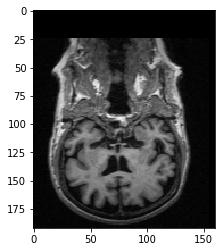

In [17]:
plt.imshow(X_train[0][:, 100, :], cmap='gray')

In [18]:
class CustomDataset(Dataset):
    """Arguments:
        img (tensor)
        label (tensor)
    """

    def __init__(self, img, label):
    
        self.img = img
        self.label = label
        
    def __len__(self):
        return len(self.label)

    def __getitem__(self, index):
        img = self.img[index]
        
        label = self.label[index]
        return img, label


In [19]:
t2 = torch.from_numpy(Y_train)
t1 = torch.from_numpy(X_train)
dataset = CustomDataset(t1, t2)
dataloader = utils.DataLoader(dataset, batch_size=1, num_workers=8, shuffle=True)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv3d(1, 10, kernel_size=(5, 5, 5))
        self.conv2 = nn.Conv3d(10, 20, kernel_size=(5, 5, 5))
        self.conv2_drop = nn.Dropout3d()
        self.fc1 = nn.Linear(500, 50)
        self.fc2 = nn.Linear(50,3)
        
    def forward(self, x):
        x = F.relu(F.max_pool3d(self.conv1(x), (2, 2, 2)))
        x = F.relu(F.max_pool3d(self.conv2_drop(self.conv2(x)), (2, 2, 2)))
        x = x.view(-1, 500)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)
#summary(model, (1, 192, 192, 160))

In [25]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)

In [26]:
for i in range(0,10):
    loss_list, batch_list = [], []

    for num, (img, label) in enumerate(dataloader):
        inputs = img.unsqueeze(0)
        print()
        output = model(inputs.float().to(torch.device("cuda" if torch.cuda.is_available() else "cpu")))
        loss = criterion(output, label.float().to(torch.device("cuda" if torch.cuda.is_available() else "cpu")))
        optimizer.zero_grad()
        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)
        loss.backward()
        optimizer.step()
        print('Train - Epoch %d, Batch: %d, Loss: %f' % (i, num, loss.detach().cpu().item()))

/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 3])) that is different to the input size (torch.Size([2997, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train - Epoch 0, Batch: 0, Loss: 1241.227173

Train - Epoch 0, Batch: 1, Loss: 840.864502

Train - Epoch 0, Batch: 2, Loss: 806.673340

Train - Epoch 0, Batch: 3, Loss: 4685.494141

Train - Epoch 0, Batch: 4, Loss: 482.792725

Train - Epoch 0, Batch: 5, Loss: 533.150330

Train - Epoch 0, Batch: 6, Loss: 1298.665161

Train - Epoch 0, Batch: 7, Loss: 5009.102051

Train - Epoch 0, Batch: 8, Loss: 3988.960449

Train - Epoch 0, Batch: 9, Loss: 5.840930

Train - Epoch 0, Batch: 10, Loss: 2430.333252

Train - Epoch 0, Batch: 11, Loss: 231.164703

Train - Epoch 0, Batch: 12, Loss: 13.623575

Train - Epoch 0, Batch: 13, Loss: 1765014400.000000

Train - Epoch 0, Batch: 14, Loss: 529.080872

Train - Epoch 0, Batch: 15, Loss: 599.384155

Train - Epoch 0, Batch: 16, Loss: 784.029907

Train - Epoch 0, Batch: 17, Loss: 1113.408691

Train - Epoch 0, Batch: 18, Loss: 3269.363037

Train - Epoch 0, Batch: 19, Loss: 2891.467041

Train - Epoch 0, Batch: 20, Loss: 2225.685303

Train - Epoch 0, Batch: 21, Lo

Train - Epoch 3, Batch: 10, Loss: 408.035034

Train - Epoch 3, Batch: 11, Loss: 879.113953

Train - Epoch 3, Batch: 12, Loss: 88.472313

Train - Epoch 3, Batch: 13, Loss: 316.369873

Train - Epoch 3, Batch: 14, Loss: 247.484375

Train - Epoch 3, Batch: 15, Loss: 1134.233887

Train - Epoch 3, Batch: 16, Loss: 7.197240

Train - Epoch 3, Batch: 17, Loss: 249.759369

Train - Epoch 3, Batch: 18, Loss: 221874304.000000

Train - Epoch 3, Batch: 19, Loss: 98.964897

Train - Epoch 3, Batch: 20, Loss: 126.899971

Train - Epoch 3, Batch: 21, Loss: 164.439041

Train - Epoch 3, Batch: 22, Loss: 736.794250

Train - Epoch 3, Batch: 23, Loss: 1379.978394

Train - Epoch 3, Batch: 24, Loss: 356.831238

Train - Epoch 3, Batch: 25, Loss: 82.619766

Train - Epoch 3, Batch: 26, Loss: 174.683716

Train - Epoch 3, Batch: 27, Loss: 205.388138

Train - Epoch 3, Batch: 28, Loss: 65.741997

Train - Epoch 3, Batch: 29, Loss: 288.050385

Train - Epoch 3, Batch: 30, Loss: 917.185303

Train - Epoch 3, Batch: 31, Loss

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
Traceback (most recent call last):
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/

KeyboardInterrupt: 

In [1]:
from slicer.ScriptedLoadableModule import *

ModuleNotFoundError: No module named 'slicer'